### Project Libraries

In [56]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

### Reading the data

In [57]:
df = pd.read_csv(r"../data/boavizta-data-us.csv")

### Showcasing some useful information for better understanding of the data

In [58]:
df.head(3)

,manufacturer,name,category,subcategory,gwp_total,gwp_use_ratio,yearly_tec,lifetime,use_location,report_date,...,added_date,add_method,gwp_transport_ratio,gwp_eol_ratio,gwp_electronics_ratio,gwp_battery_ratio,gwp_hdd_ratio,gwp_ssd_ratio,gwp_othercomponents_ratio,comment
0,Apple,13-inch MacBook Air (M1 CPU) 256GB - 2020,Workplace,Laptop,161.0,0.15,NaN,3.0,WW,November 2020,...,27-05-2022,Manual,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,13-inch MacBook Air (M1 CPU) 512GB - 2020,Workplace,Laptop,181.0,0.15,NaN,3.0,WW,November 2020,...,27-05-2022,Manual,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,13-inch MacBook Air with Retina display (1.1GH...,Workplace,Laptop,174.0,0.15,NaN,3.0,WW,March 2020,...,01-11-2020,Initial Parsing,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manufacturer               1226 non-null   object 
 1   name                       1226 non-null   object 
 2   category                   1226 non-null   object 
 3   subcategory                1226 non-null   object 
 4   gwp_total                  1226 non-null   float64
 5   gwp_use_ratio              1151 non-null   float64
 6   yearly_tec                 734 non-null    float64
 7   lifetime                   1193 non-null   float64
 8   use_location               1113 non-null   object 
 9   report_date                1211 non-null   object 
 10  sources                    1226 non-null   object 
 11  sources_hash               1226 non-null   object 
 12  gwp_error_ratio            1022 non-null   float64
 13  gwp_manufacturing_ratio    757 non-null    float

In [60]:
df.columns

Index(['manufacturer', 'name', 'category', 'subcategory', 'gwp_total',
       'gwp_use_ratio', 'yearly_tec', 'lifetime', 'use_location',
       'report_date', 'sources', 'sources_hash', 'gwp_error_ratio',
       'gwp_manufacturing_ratio', 'weight', 'assembly_location', 'screen_size',
       'server_type', 'hard_drive', 'memory', 'number_cpu', 'height',
       'added_date', 'add_method', 'gwp_transport_ratio', 'gwp_eol_ratio',
       'gwp_electronics_ratio', 'gwp_battery_ratio', 'gwp_hdd_ratio',
       'gwp_ssd_ratio', 'gwp_othercomponents_ratio', 'comment'],
      dtype='object')

### Cleaning the data
1. Dropping some columns that will not be used for the analysis

In [61]:
df.drop(columns = ['sources', 'server_type', 'hard_drive', 'memory', 'number_cpu', 'height', 'added_date', 'add_method'], inplace=True)

## MANUFACTURERS
- Focus: Emissions reduction, lifecycle design and production optimization.

#### The function bellow is being used to evaluate the Strength of the tests. 👇

In [62]:
def evaluating_strength(correlation_coefficient):
    abs_r = abs(correlation_coefficient)
    if correlation_coefficient == 0:
        return "No correlation"
    elif 0 < abs_r < 0.3:
        return "Weak correlation (linear relationship is very weak or negligible)"
    elif 0.3 <= abs_r < 0.5:
        return "Moderate correlation"
    elif 0.5 <= abs_r < 0.7:
        return "Strong correlation"
    elif 0.7 <= abs_r < 1:
        return "Very strong correlation"
    elif abs_r == 1:
        return "Perfect correlation"
    else:
        return "Invalid value for r"

| Hypothesis                                                                | Variable(s) Involved               | Variable(s) Type(s)    | Test(s)                  |
|---------------------------------------------------------------------------|------------------------------------|------------------------|--------------------------|
| (H1) Higher product weight correlates with higher manufacturing emissions | `weight`, `gwp_manufacturing_ratio` | Continuous/ Continuous | Pearson correlation test |

In [63]:
df.groupby('subcategory')['weight'].apply(lambda x: x.isna().all())

subcategory
Converged         False
Converged Edge    False
Desktop           False
Entertainment      True
EntertainmentT     True
Gaming            False
Hard drive         True
IoT               False
Laptop            False
Monitor           False
Multimedia        False
Network           False
Printer            True
SAN/NAS            True
Server            False
Smartphone        False
Tablet            False
Thin Client       False
Thin client       False
Workstation        True
Name: weight, dtype: bool

In [64]:
df.groupby('subcategory')['gwp_manufacturing_ratio'].apply(lambda x: x.isna().all())

subcategory
Converged         False
Converged Edge    False
Desktop           False
Entertainment      True
EntertainmentT    False
Gaming            False
Hard drive         True
IoT               False
Laptop            False
Monitor           False
Multimedia        False
Network           False
Printer            True
SAN/NAS            True
Server            False
Smartphone        False
Tablet            False
Thin Client       False
Thin client       False
Workstation       False
Name: gwp_manufacturing_ratio, dtype: bool

- The subcategories marked as `True` above 👆 indicate cases where all `weight` and `gwp_manufacturing_ratio` values are missing.

In [65]:
x = df['weight'].isnull().sum()
xx = df['gwp_manufacturing_ratio'].isnull().sum()
print(x, xx)

191 469


- To handle the missing values in the columns shown above 👆, we will fill them using the mean value within each respective subcategory. However, in some subcategories, all entries for weight and gwp_manufacturing_ratio are null. In such cases, we will use the average values calculated at the category level 👇 to fill the remaining missing data.

In [66]:
## Subcategory
df['weight'] = df['weight'].fillna(df.groupby('subcategory')['weight'].transform('mean'))

df['gwp_manufacturing_ratio'] = df['gwp_manufacturing_ratio'].fillna(df.groupby('subcategory')['gwp_manufacturing_ratio'].transform('mean'))

# Number of missing data
x = df['weight'].isnull().sum()
xx = df['gwp_manufacturing_ratio'].isnull().sum()
print(x, xx)

29 24


In [67]:
## Category
df['weight'] = df['weight'].fillna(df.groupby('category')['weight'].transform('mean'))

df['gwp_manufacturing_ratio'] = df['gwp_manufacturing_ratio'].fillna(df.groupby('category')['gwp_manufacturing_ratio'].transform('mean'))

# Number of missing data
x = df['weight'].isnull().sum()
xx = df['gwp_manufacturing_ratio'].isnull().sum()
print(x, xx)

0 0


In [68]:
r1, p1 = stats.pearsonr(df['weight'], df['gwp_manufacturing_ratio'])

print (f"\nPearson correlation coefficient(r)    -> {r1}\n{evaluating_strength(r1)}\nPvalue     ->{p1:.4f}")


Pearson correlation coefficient(r)    -> -0.42449000501191486
Moderate correlation
Pvalue     ->0.0000


- Pearson R = -0.42
    - Indicates a moderate negative correlation: as the product weight increases, the share of emissions from manufacturing tends to decrease.

- P-value = 0
    - The correlation is statistically significant, meaning it’s very unlikely to have occurred by chance.

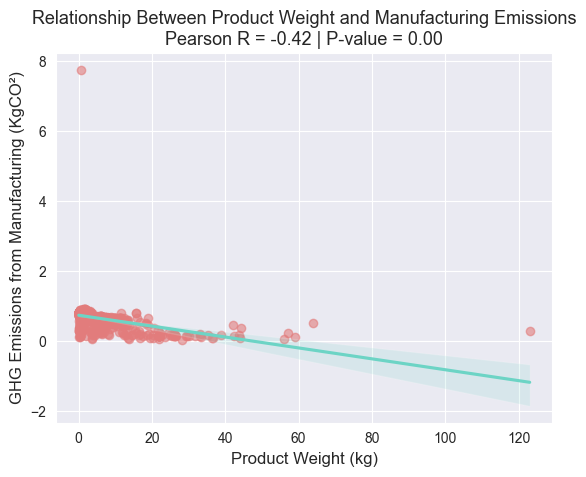

In [69]:
sns.regplot(x='weight', y='gwp_manufacturing_ratio', data=df,
            line_kws={'color': '#6cd4c5'},
            scatter_kws={'alpha': 0.6, 'color': '#e27c7c'})

plt.title(f'Relationship Between Product Weight and Manufacturing Emissions\nPearson R = {r1:.2f} | P-value = {p1:.2f}', fontsize=13)
plt.xlabel('Product Weight (kg)', fontsize=12)
plt.ylabel('GHG Emissions from Manufacturing (KgCO²)', fontsize=12)
plt.show()

Lighter products tend to have a larger portion of their carbon footprint coming from the manufacturing phase, while heavier products likely have a more balanced emission distribution across other phases like usage and transportation.

__MANUFACTURERS__ Should focus on optimizing the manufacturing process for lightweight devices, since this phase contributes proportionally more to their emissions.

| Hypothesis                                                                | Variable(s) Involved               | Variable(s) Type(s) | Test(s) |
|---------------------------------------------------------------------------|------------------------------------|---------------------|---------|
| (H2) Devices from different manufacturers have different average GHG emissions.| `manufacturer`, `gwp_total` | Nominal/ Continuous | Anova   |

- Checking if there's any null value is those variables

In [70]:
x = df['manufacturer'].isnull().sum()
xx = df['gwp_total'].isnull().sum()
print(x, xx)

0 0


In [71]:
groups = []

for name, group in df.groupby('manufacturer'):
    x = group['gwp_total']
    groups.append(x)

f2, p2 = stats.f_oneway(*groups)

print(f"F = {f2:.2f}, p-value = {p2:.4f}")

F = 11.04, p-value = 0.0000


- F = 11.04
    - Indicates clear variation in average emissions among manufacturers.

- P-value = 0
    - The correlation is statistically significant, meaning it’s very unlikely to have occurred by chance.

Based on the test, we reject the null hypothesis and conclude that at least one manufacturer has a significantly different average GHG emission (gwp_total) compared to the others.

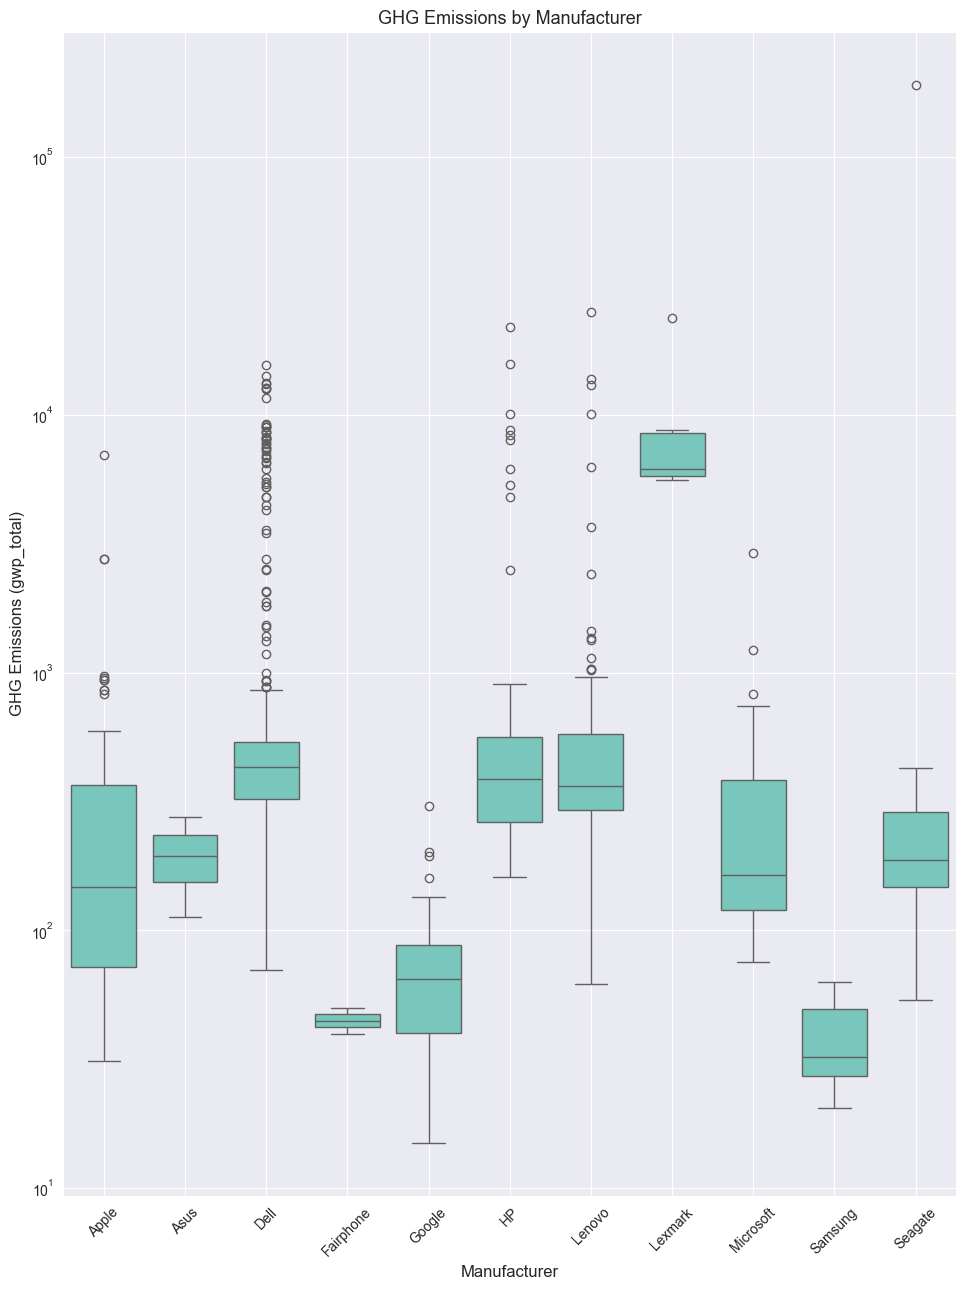

In [72]:
plt.figure(figsize=(10,13))
sns.boxplot(x='manufacturer', y='gwp_total', data=df,
            color='#6cd4c5')


plt.title('GHG Emissions by Manufacturer', fontsize=13)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('GHG Emissions (gwp_total)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.yscale('log')

__Manufacturers__ significantly influence the environmental impact of IT products, as shown by the variation in GHG emissions across brands. High-emission manufacturers like Lexmark and Dell should focus on reducing their footprint through cleaner materials and more efficient production. Low-emission brands like Fairphone prove that sustainable design is achievable, setting a benchmark for the industry.

| Hypothesis                                                                | Variables(s) Involved               | Variable(s) Type(s)    | Test(s)                 |
|---------------------------------------------------------------------------|-------------------------------------|------------------------|-------------------------|
| (H3) Larger screen sizes are associated with higher transportation emissions.| `screen_size`, `gwp_transport`| Continuous/ Continuous | Spearman, Kendall's Tau |

Null values in the variables 👇

In [73]:
x = df['screen_size'].isnull().sum()
xx = df['gwp_transport_ratio'].isnull().sum()
print(x, xx)

353 739


Addressing the mean values for the `gwp_transport_ratio` based on the subcategory/category.

In [74]:
## Subcategory
df['gwp_transport_ratio'] = df['gwp_transport_ratio'].fillna(df.groupby('subcategory')['gwp_transport_ratio'].transform('mean'))

# Number of missing data
x = df['gwp_transport_ratio'].isnull().sum()
print(x)

35


In [75]:
## Category
df['gwp_transport_ratio'] = df['gwp_transport_ratio'].fillna(df.groupby('category')['gwp_transport_ratio'].transform('mean'))

# Number of missing data
x = df['gwp_transport_ratio'].isnull().sum()
print(x)

0


Dealing with the null `screen_size` values by deleting the rows

In [76]:
df = df.dropna(subset=['screen_size']).reset_index(drop=True)

#### Spearman's Test

In [77]:
sp3, p3 = stats.spearmanr(df['screen_size'], df['gwp_transport_ratio'])

print (f"\nSpearman's correlation coefficient(ρ)    -> {sp3}\n{evaluating_strength(sp3)}\nPvalue     ->{p3:.4f}")


Spearman's correlation coefficient(ρ)    -> 0.21851128002909587
Weak correlation (linear relationship is very weak or negligible)
Pvalue     ->0.0000


- ρ = 0.22
    - Indicates a weak positive monotonic correlation: as screen size increases, transport emissions ratio tends to increase slightly.
- p-value = 0.00
    - The correlation is statistically significant, meaning it’s very unlikely to have occurred by chance.


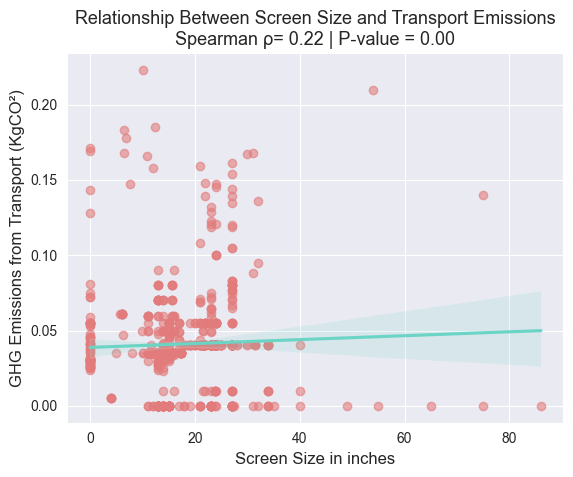

In [78]:
sns.regplot(x='screen_size', y='gwp_transport_ratio', data=df,
            line_kws={'color': '#6cd4c5'},
            scatter_kws={'alpha': 0.6, 'color': '#e27c7c'})

plt.title(f'Relationship Between Screen Size and Transport Emissions\nSpearman ρ= {sp3:.2f} | P-value = {p3:.2f}', fontsize=13)
plt.xlabel('Screen Size in inches', fontsize=12)
plt.ylabel('GHG Emissions from Transport (KgCO²)', fontsize=12)
plt.show()

The scatterplot shows a highly dispersed pattern with a slight upward trend, consistent with the weak but significant Spearman correlation. This suggests that as screen size increases, the proportion of total emissions attributed to transport tends to increase, although the relationship is not strong.

__Manufacturers__ should note that devices with larger screens may contribute more proportionally to transport-related emissions, potentially due to larger packaging volumes, increased weight, or reduced shipping density. While the correlation is weak, it highlights an opportunity for optimizing logistics and packaging design, particularly for large-format devices that are scaled globally.

#### Kendall's Tau Test

In [79]:
tau, p4 = stats.kendalltau(df['screen_size'], df['gwp_transport_ratio'])

print (f"\nKendall's correlation coefficient(τ)    -> {tau}\n{evaluating_strength(tau)}\nPvalue     ->{p4:.4f}")


Kendall's correlation coefficient(τ)    -> 0.1846274346566485
Weak correlation (linear relationship is very weak or negligible)
Pvalue     ->0.0000


- τ = 0.18
    - This indicates a weak positive monotonic correlation — as screen size increases, the proportion of emissions from transport tends to increase.
- p-value = 0.00
    - The correlation is statistically significant, meaning it’s very unlikely to have occurred by chance.

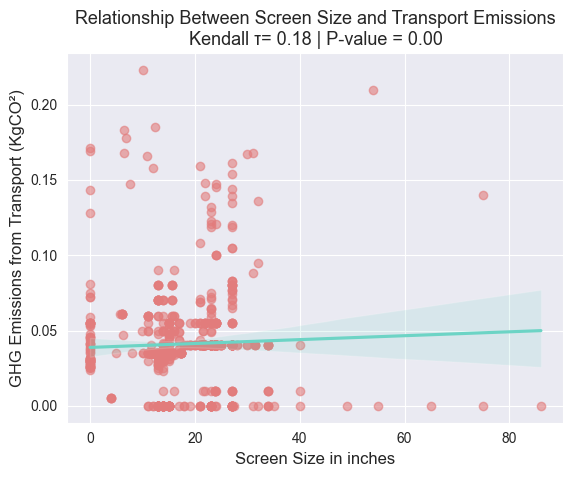

In [80]:
sns.regplot(x='screen_size', y='gwp_transport_ratio', data=df,
            line_kws={'color': '#6cd4c5'},
            scatter_kws={'alpha': 0.6, 'color': '#e27c7c'})

plt.title(f'Relationship Between Screen Size and Transport Emissions\nKendall τ= {tau:.2f} | P-value = {p4:.2f}', fontsize=13)
plt.xlabel('Screen Size in inches', fontsize=12)
plt.ylabel('GHG Emissions from Transport (KgCO²)', fontsize=12)
plt.show()

Although the relationship is weak, the trend shown in the scatter plot is consistent: devices with larger screens tend to be slightly more associated with higher transport emission ratios. The distribution of points supports this modest upward trend, and the use of Kendall’s Tau is appropriate here because it detects general monotonic patterns rather than strict linearity.